Firstly, libraries that will be needed later are imported, such as:
 - **Pandas**: Data manipulation library that provides data structures to handle and analyzed structured data.
 - **Numpy**: Numerical computations library like linear algebra.
 - **Seaborn**: Statistical data visualization library built of Matplotlib. 
 - **Statsmodels**: Statistical modeling and hypothesis testing library.
 - **Matplotlib**: Library used for customizing plots.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

**This .CSV file contains data from the different countries of the 5 continents dating back to 2005**.

In [2]:
datasetNations = pd.read_csv("https://raw.githubusercontent.com/DireccionAcademicaADL/Nations-DB/main/nations.csv", encoding = "ISO-8859-1")
datasetNations.head()

,Unnamed: 0,country,region,gdp,school,adfert,chldmort,life,pop,urban,femlab,literacy,co2,gini
0,1,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,2,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,3,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,4,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,5,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


The data must be processed, both cleaning and preparation, for subsequent analysis and representation of the data. So:
 - Rename columns for easiest comprehension.
 - Drop column 'Unnamed: 0' because is uselss, it seems to be kind of index.

In [3]:
# Rename columns, easiest comprehension
datasetNations.rename(columns = {'gdp':'pib', 'school': 'years_school', 'gini': 'income_inequality', 'femlab': 'rate_M/W_laborMarket', 'pop': 'population', 'life': 'life_expectancy'}, inplace = True)

In [4]:
# Drop column 'Unnamed: 0', seems to be kind of index
datasetNations.drop(columns = ["Unnamed: 0"], inplace = True)
datasetNations.head()

,country,region,pib,years_school,adfert,chldmort,life_expectancy,population,urban,rate_M/W_laborMarket,literacy,co2,income_inequality
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999


Print how much countries are in each continent.

In [5]:
# Number of countries in each region
datasetNations["region"].value_counts()

Africa      52
Asia        49
Europe      43
Americas    35
Oceania     15
Name: region, dtype: int64

Show how many non-null values are in the nations dataset.

In [6]:
# Show how many non-null values are
datasetNations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   country               194 non-null    object 
 1   region                194 non-null    object 
 2   pib                   179 non-null    float64
 3   years_school          188 non-null    float64
 4   adfert                194 non-null    float64
 5   chldmort              193 non-null    float64
 6   life_expectancy       194 non-null    float64
 7   population            194 non-null    int64  
 8   urban                 194 non-null    float64
 9   rate_M/W_laborMarket  177 non-null    float64
 10  literacy              135 non-null    float64
 11  co2                   185 non-null    float64
 12  income_inequality     81 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 19.8+ KB


In [7]:
# Calculate basic statistics of numeric attributes
datasetNations.describe()

,pib,years_school,adfert,chldmort,life_expectancy,population,urban,rate_M/W_laborMarket,literacy,co2,income_inequality
count,179.000000,188.000000,194.000000,193.000000,194.000000,1.940000e+02,194.000000,177.000000,135.000000,185.000000,81.000000
mean,12118.739193,7.459220,51.814433,47.650259,68.729295,3.437752e+07,55.434880,0.691606,81.533148,17.885946,40.477778
std,13942.341217,2.959589,44.066120,52.809400,10.055404,1.314004e+08,23.439101,0.182871,19.466359,25.670704,8.487874
min,279.799988,1.150000,1.000000,2.250000,45.849998,9.767000e+03,10.250000,0.194200,23.600000,0.100000,19.000000
25%,2100.300049,5.225000,16.500000,10.250000,63.745833,1.483754e+06,36.325000,0.578200,70.099998,2.250000,34.000000
50%,6932.799805,7.950000,39.350000,24.000000,72.183331,6.784909e+06,56.475000,0.730400,89.699997,8.450000,39.700001
75%,17576.299805,9.850000,74.375002,69.750000,75.545835,2.225532e+07,73.483334,0.820600,97.699997,25.000000,46.200001
max,74906.000000,12.700000,207.100006,209.000000,82.766663,1.324696e+09,100.000000,1.034400,100.000000,210.649994,58.500000


Identify which countries are above or below the co2 average. Then, it can be concluded that 130 countries are below the average in terms of CO2 emissions, so around 33% of the total countries are above average in CO2 emissions.

In [8]:
# Identify which countries are below the average and which countries are above the average
datasetNations["under_above_co2"] = np.where(datasetNations["co2"] > datasetNations["co2"].mean(), "Above average", "Below average")
datasetNations.head()

,country,region,pib,years_school,adfert,chldmort,life_expectancy,population,urban,rate_M/W_laborMarket,literacy,co2,income_inequality,under_above_co2
0,Algeria,Africa,7300.399902,6.716667,7.300000,34.75,72.316666,34172236,64.933334,0.4522,72.599998,15.0,NaN,Below average
1,Benin,Africa,1338.800049,3.100000,111.699997,122.75,54.733334,8237634,41.000000,0.8482,41.700001,1.2,NaN,Below average
2,Botswana,Africa,12307.400391,8.600000,52.099998,60.25,52.250000,1941233,59.250000,0.8870,84.099998,9.2,NaN,Below average
3,Burkina Faso,Africa,1063.400024,1.300000,124.800003,170.50,53.783333,15308383,23.583334,0.8584,23.600000,0.2,NaN,Below average
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.1,33.299999,Below average


In [9]:
datasetNations["under_above_co2"].value_counts()

Below average    130
Above average     64
Name: under_above_co2, dtype: int64

Text(0.5, 1.0, 'Histogram - Income Inequality\n')

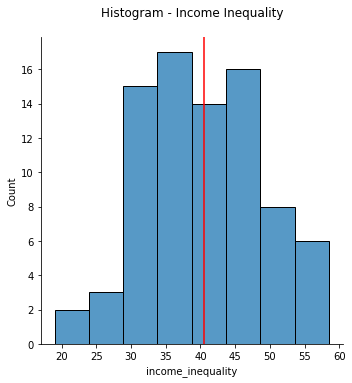

In [10]:
# Histogram -income inequality data distribution. Red line shows income inequality average.
sns.displot(datasetNations["income_inequality"], kind = "hist")
plt.axvline(datasetNations["income_inequality"].mean(), color = "red")
plt.title("Histogram - Income Inequality\n")

Through this bar graph, you can clearly see that infant mortality on the continent of Africa is outrageous compared to Europe. 

In **European** countries, the average mortality at these young ages does not even reach 10%, it remains at **7%**, while in **Africa** this average **exceeds 100%**, that is, a clear difference that may be due to several factors. that cannot be known with the data set being analyzed.

109.75
7.046511627906977


C:\Users\zorri\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Child Mortality Comparison: Europe vs. Africa\n')

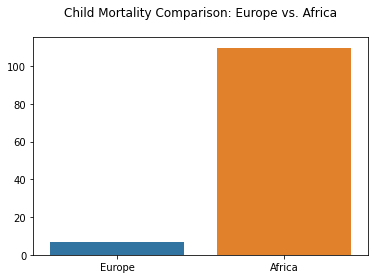

In [11]:
# Child mortality between Africa and Europe
datasetAfrica = datasetNations[datasetNations["region"]=="Africa"]
datasetEurope = datasetNations[datasetNations["region"]=="Europe"]

africa_average = datasetAfrica["chldmort"].mean()
europe_average = datasetEurope["chldmort"].mean()

print(africa_average)
print(europe_average)

sns.barplot((["Europe", "Africa"]), ([europe_average, africa_average]))
plt.title("Child Mortality Comparison: Europe vs. Africa\n")

Text(0.5, 1.0, 'Box plot: Scholarship distribution per region\n')

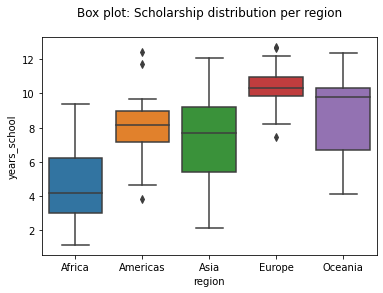

In [12]:
# Scholarity distribution per region
sns.boxplot(x = datasetNations["region"], y = datasetNations["years_school"])
plt.title("Box plot: Scholarship distribution per region\n")

To make a correct scatterplot it is necessary to eliminate null values from the data set.

Then, the schooling rates are graphed against literacy.

And it can be concluded that **the more years in school, the higher the level of literacy**. This is logical and ideal, since spending time at school is synonymous with learning and achieving a higher level of literacy.

In [13]:
# Drop null values
datasetNationsNotNull = datasetNations.dropna()
datasetNationsNotNull.head()

,country,region,pib,years_school,adfert,chldmort,life_expectancy,population,urban,rate_M/W_laborMarket,literacy,co2,income_inequality,under_above_co2
4,Burundi,Africa,349.200012,2.483333,18.600000,168.50,48.866665,7821783,10.250000,1.0344,66.599998,0.10,33.299999,Below average
11,Congo (Dem Rep),Africa,279.799988,3.416667,201.399994,199.00,47.516666,61654348,33.633331,0.6552,66.800003,0.10,44.400002,Below average
12,Côte d'Ivoire,Africa,1539.199951,3.200000,129.399994,123.25,53.049999,18844750,48.666664,0.6132,55.299999,1.45,46.099998,Below average
14,Egypt,Africa,4754.399902,5.950000,46.599998,24.75,72.333336,77645648,43.183334,0.3092,68.900002,8.45,32.099998,Below average
17,Ethiopia,Africa,741.400024,1.500000,72.400002,112.00,57.049999,78593232,16.283333,0.8700,29.799999,0.30,29.799999,Below average


Text(0.5, 1.0, 'Dispersion diagram: Scholarship rate vs Literacy rate\n')

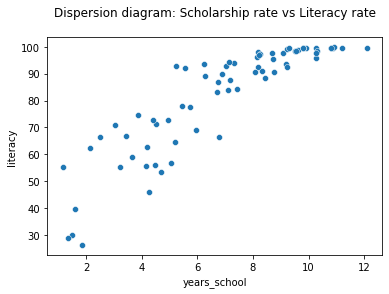

In [14]:
# Dispersion diagram between scholarship and literacy rate
sns.scatterplot(x = datasetNationsNotNull["years_school"], y = datasetNationsNotNull["literacy"])
plt.title("Dispersion diagram: Scholarship rate vs Literacy rate\n")

Thanks to the **correlation matrix**, all the variables existing in the selected data set can be compared and thus be able to relate each of the variables to carry out adequate monitoring to analyze different characteristics. It should be noted that the more intensity the green color has, it means that there is a greater correlation between the pair of variables. However, the lower the intensity of the color, the lower the level of correlation will be.

Text(0.5, 1.0, 'Correlation matrix\n')

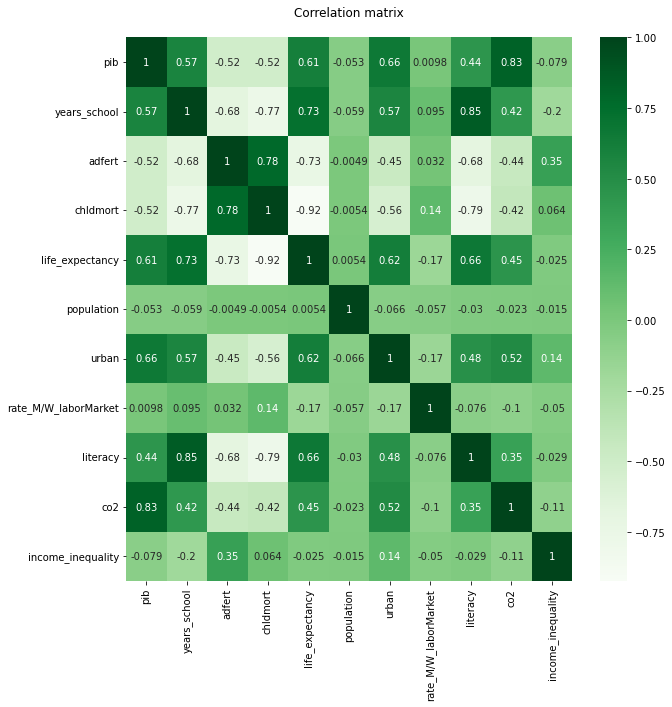

In [15]:
# Correlation matrix
correlationTable = datasetNations.corr()
plt.rcParams["figure.figsize"] = (10, 10)
sns.heatmap(correlationTable, cmap = "Greens", annot = True)
plt.title("Correlation matrix\n")